# Stock Market Analysis

A stock is the small chunk of ownership in the company. The stock price of the company reflects the net evaluation of the company and also gives a little insight into its performance. These stocks are traded on exchanges and their prices are constantly changing due to their demand and supply in the market. If a stock is in high demand and low in supply i.e. more people want to buy it and fewer people are willing to sell it then the price for the stock will go up and similarly if the stock is in low demand and high on supply which means people more people are ready to sell it but fewer people are willing to buy it then its prices go down.

The sudden increase in the demand for the stock can be due to various reasons including positive news about the company or an announcement from the company. After a period of time when the demand for the stock vanishes its prices slowly creep down as the investor loses interest in it. These stock prices going up and down is an iterative process and repeated. This volatility of stock makes investors nervous while investing in a company. So to understand the risk associated with it there must be a proper analysis of stock before buying it.

# Importing Packages

In [1]:
!pip install yfinance

In [1]:
import pandas as pd
import datetime
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

# Data description

We have downloaded the daily stock prices data using the Yahoo finance API functionality. It’s a five-year data capturing Open, High, Low, Close, and Volume

- Open: The price of the stock when the market opens in the morning
- Close: The price of the stock when the market closed in the evening
- High: Highest price the stock reached during that day
- Low: Lowest price the stock is traded on that day
- Volume: The total amount of stocks traded on that day

Here, we will take the Example of three companies TCS, Infosys, and Wipro which are the industry leaders in providing IT services.

In [3]:
start = "2014-01-01"
end = '2019-1-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Exploratory Analysis

Text(0.5, 1.0, 'Stock Prices of TCS, Infosys and Wipro')

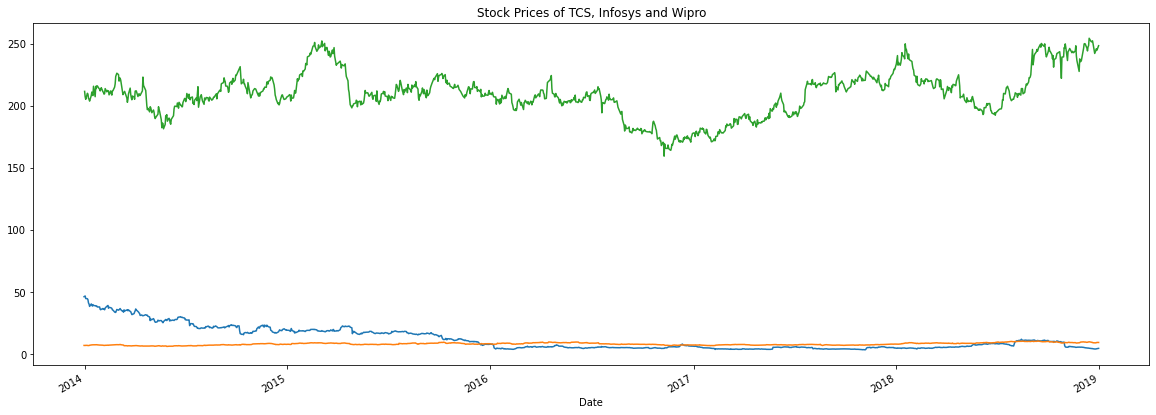

In [4]:
tcs['Open'].plot(label = 'TCS', figsize = (20,7))
infy['Open'].plot(label = "Infosys")
wipro['Open'].plot(label = 'Wipro')
plt.title('Stock Prices of TCS, Infosys and Wipro')

The above graph is the representation of open stock prices for these three companies via line graph by leveraging matplotlib library in python. The Graph clearly shows that the prices of Wipro is more when comparing it to other two companies but we are not interested in the absolute prices for these companies but wanted to understand how these stock fluctuate with time.

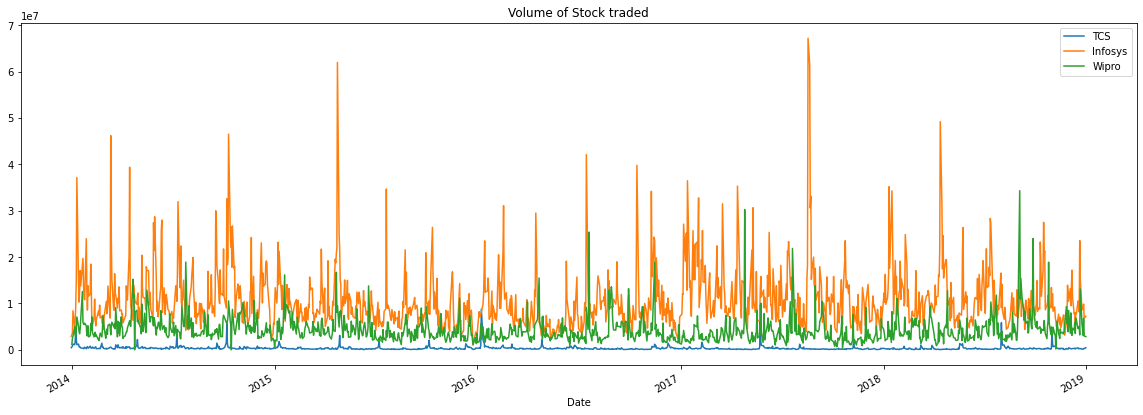

In [5]:
tcs['Volume'].plot(label = 'TCS', figsize = (20,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

The Graph shows the volume traded by these companies which clearly shows that stocks of Infosys are traded more compared to other IT stocks.

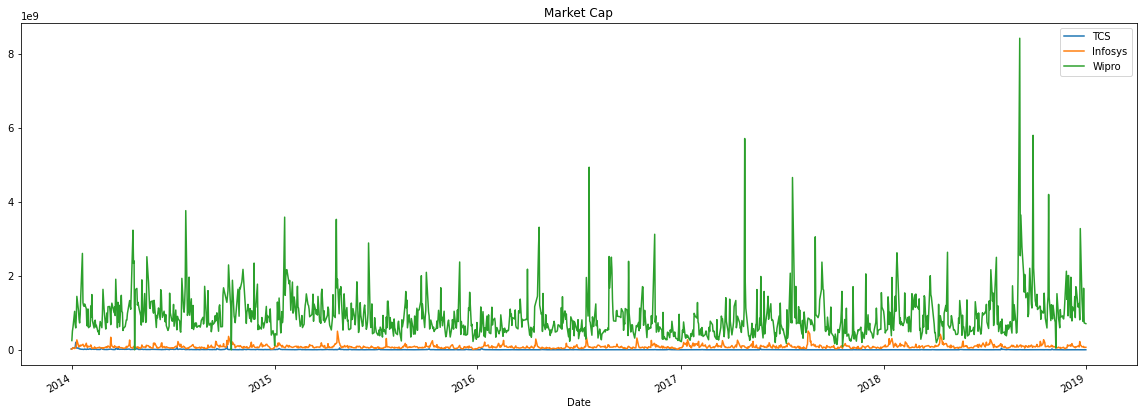

In [7]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (20,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

Only volume or stock prices do not provide a comparison between companies. In this case, we have plotted a graph for Volume * Share price to better compare the companies. As we can clearly see from the graph that Wipro seems to be traded on a higher side.

# Moving Averages
As we know the stock prices are highly volatile and prices change quickly with time. To observe any trend or pattern we can take the help of a 50-day 200-day average

<AxesSubplot:xlabel='Date'>

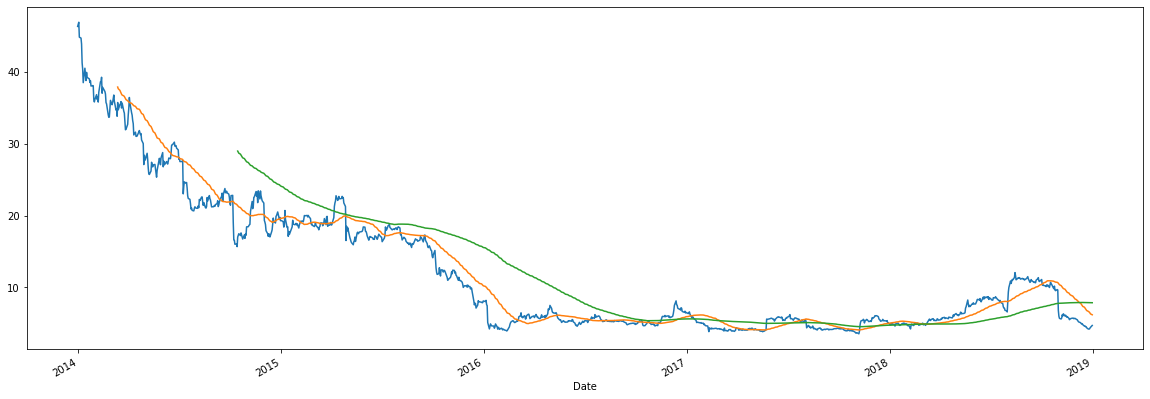

In [10]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (20,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

# Scattered plot matrix

array([[<AxesSubplot:xlabel='TCSOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<AxesSubplot:xlabel='TCSOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <AxesSubplot:xlabel='WiproOpen', ylabel='WiproOpen'>]],
      dtype=object)

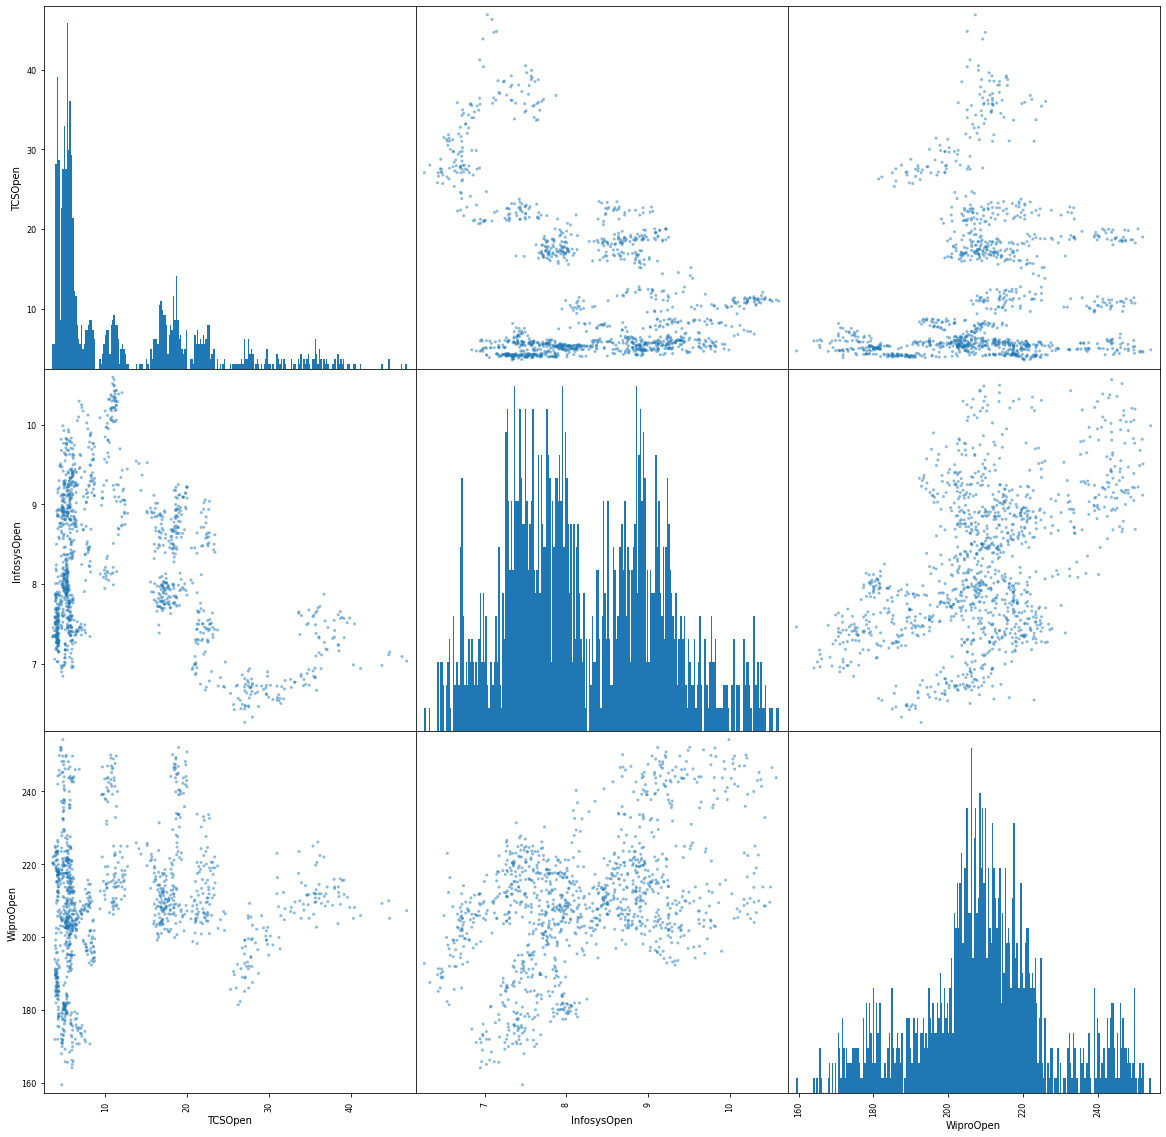

In [14]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (20,20), hist_kwds= {'bins':250})

The above graph is the combination of histograms for each company and a subsequent scattered plot taking two companies’ stocks at a time. From the graph, we can clearly figure out that Wipro stocks are loosely showing a linear correlation with Infosys.

# Percentage increase in stock value

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

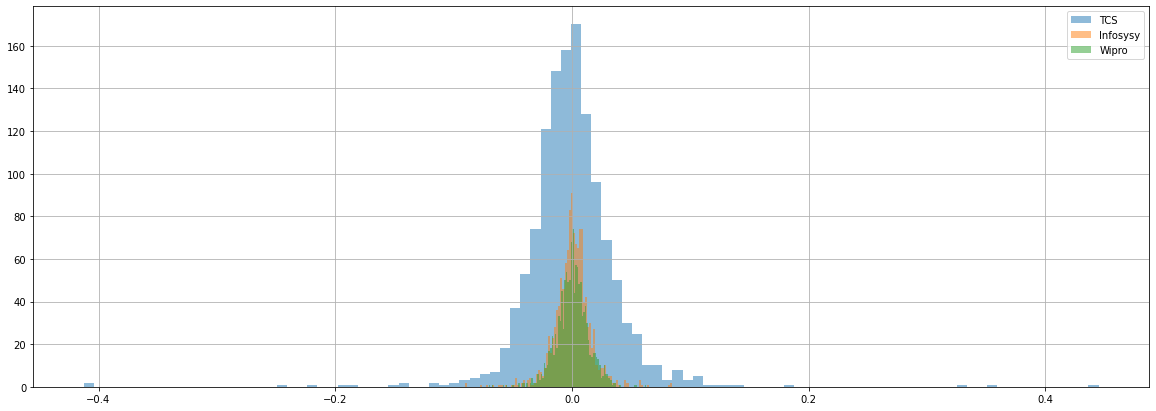

In [15]:
#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (20,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

It is clear from the graph that the percentage increase in stock price histogram for TCS is the widest which indicates the stock of TCS is the most volatile among the three companies compared.

# Conclusion

The above analysis can be used to understand a stock’s short-term and long-term behaviour. A decision support system can be created which stock to pick from industry for low-risk low gain or high-risk high gain depending on the risk apatite of the investor.

